# 🚦 Traffic Data Analysis: Enhancing Urban Mobility and Planning







## Introduction

Urban areas worldwide face increasing traffic congestion, impacting productivity, environmental quality, and overall quality of life. Analyzing traffic flow patterns is essential for effective urban planning and improving transportation infrastructure.

This project explores a comprehensive traffic dataset containing hourly vehicle counts collected from multiple junctions. Our primary goal is to gain insights into traffic behaviors, such as identifying peak hours, detecting seasonal and daily patterns, and highlighting differences between various junctions.

Through **Exploratory Data Analysis (EDA)**, we aim to answer critical questions like:

- Which junctions experience the heaviest traffic?
- What are the peak traffic hours, and how do they differ across days of the week?
- Can we detect clear temporal patterns or anomalies in traffic volumes?

These insights can inform urban planners, help manage congestion effectively, and ultimately improve mobility and sustainability within the city.

Let's dive into the data and start uncovering valuable insights!

## 🎯 Research Objectives

Our analysis aims to achieve the following objectives:

1. **Analyze Traffic Patterns**
   - Identify hourly, daily, and monthly variations in traffic volume.

2. **Identify Peak Traffic Periods**
   - Pinpoint peak congestion hours and days, comparing weekday and weekend patterns.

3. **Compare Junctions**
   - Investigate differences in vehicle traffic among various junctions to understand congestion hotspots.

4. **Detect Temporal Trends and Seasonality**
   - Examine trends, seasonality, and recurring patterns within the dataset to anticipate future traffic scenarios.

5. **Highlight Anomalies**
   - Identify any irregularities or unexpected events in traffic flows that may require further investigation or intervention.

By achieving these objectives, we aim to provide actionable insights for better urban planning, improved traffic management, and enhanced mobility.

## Data Understanding and Preprocessing

## 📌 Data Overview



This dataset, titled **"Traffic Prediction Dataset"**, was sourced from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset). It contains traffic data collected hourly from four different junctions within an urban area. The data spans from **November 1, 2015**, to **June 30, 2017**, providing a substantial historical record to analyze urban mobility patterns.

### Dataset Attributes:

- **DateTime**: Represents the specific date and time (hourly intervals) when the data was recorded.
- **Junction**: Indicates the junction number (from 1 to 4) where vehicles were counted.
- **Vehicles**: Shows the total number of vehicles passing through the junction during each recorded hour.
- **ID**: A unique identifier for each record, constructed from the date and time information.

The primary goal of analyzing this dataset is to understand the traffic flow dynamics, identify patterns or congestion points, and potentially forecast future traffic volumes to improve urban planning and mobility strategies.

Let's begin by exploring and preparing our data for further analysis!

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
data = pd.read_csv("traffic.csv")
data.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

### Data Exploration

In [3]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

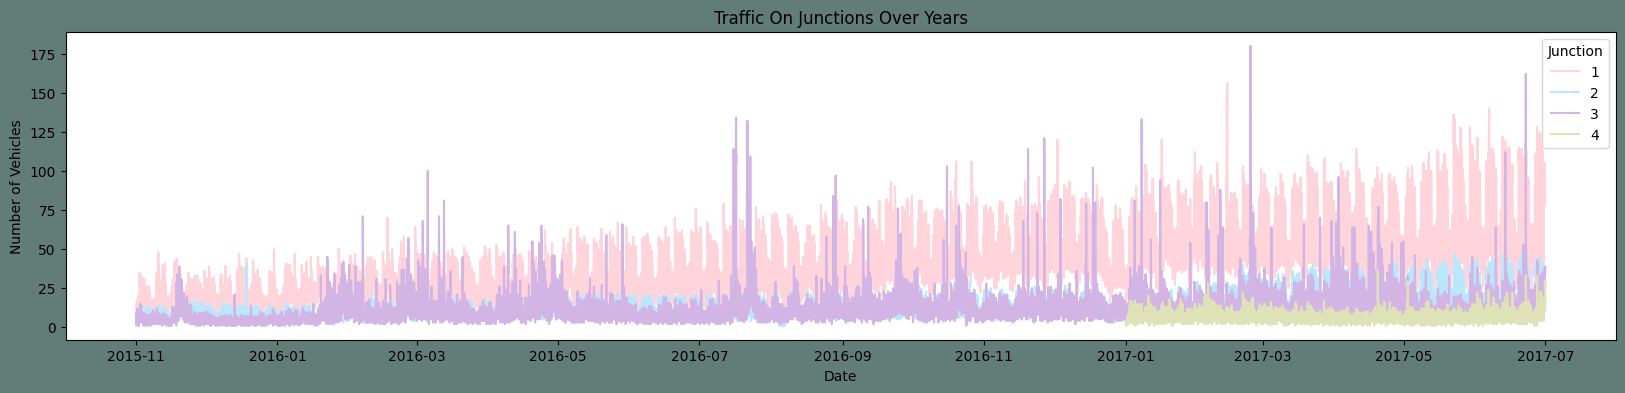

In [4]:
# #df to be used for EDA
df=data.copy()
# #Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

### Feature Engineering

In [5]:
df["Year"] = df['DateTime'].dt.year
df["Month"] = df['DateTime'].dt.month
df["Date_no"] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df.head()

DateTime  Junction  Vehicles  Year  Month  Date_no  Hour  Day
0 2015-11-01 00:00:00         1        15  2015     11        1     0    1
1 2015-11-01 01:00:00         1        13  2015     11        1     1    1
2 2015-11-01 02:00:00         1        10  2015     11        1     2    1
3 2015-11-01 03:00:00         1         7  2015     11        1     3    1
4 2015-11-01 04:00:00         1         9  2015     11        1     4    1

### Exploratory Data Analysis

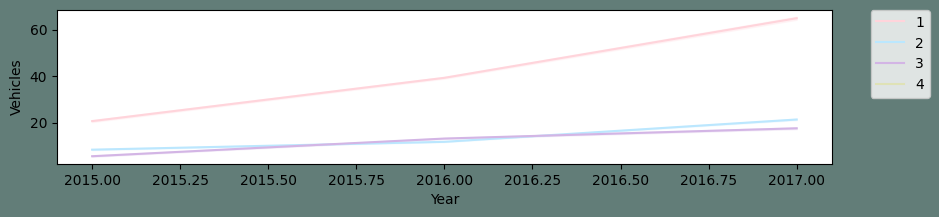

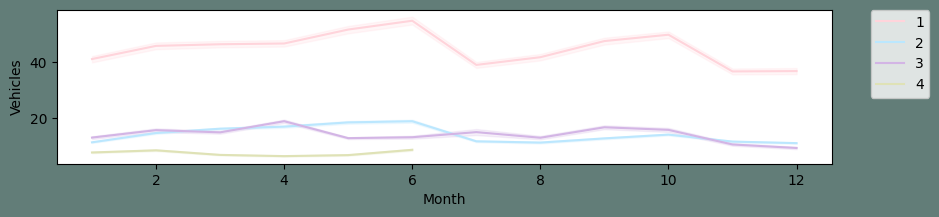

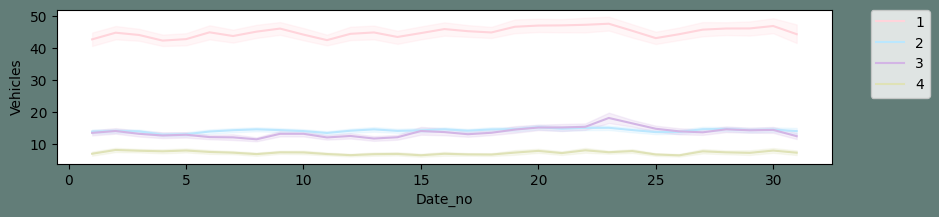

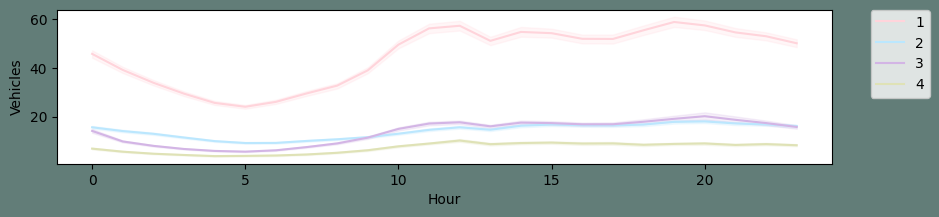

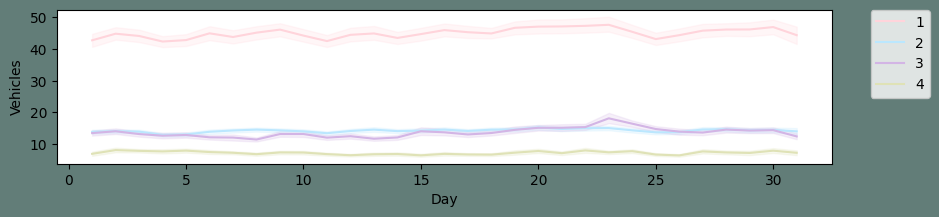

In [6]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

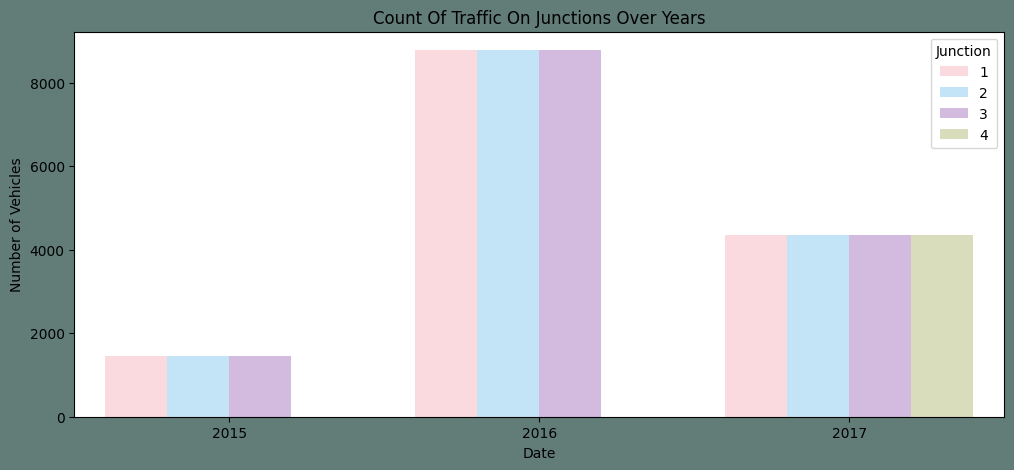

In [7]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

<Axes: >

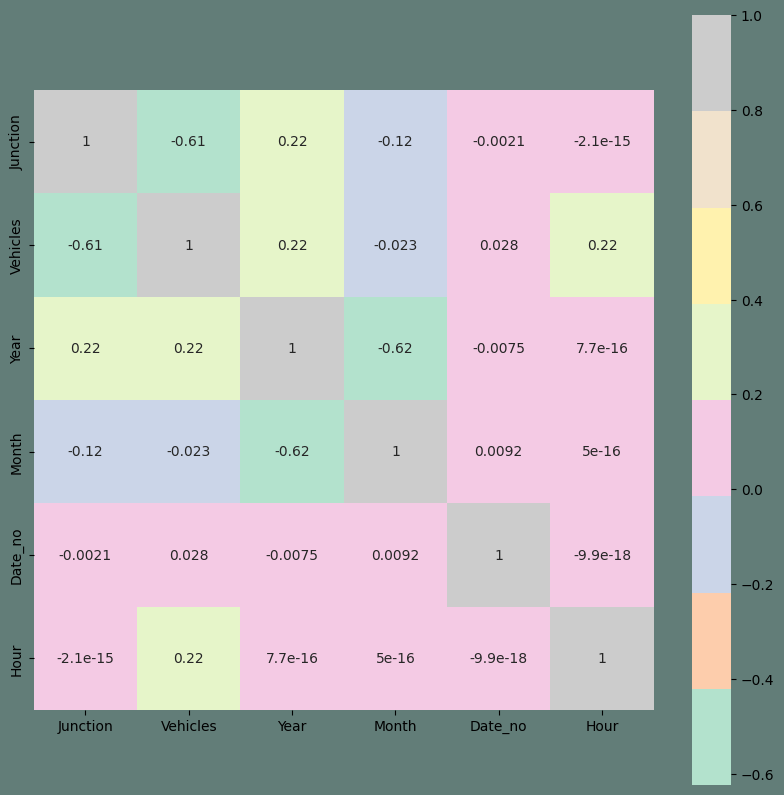

In [8]:
corrmat = df.drop(columns=["Day", 'DateTime']).corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

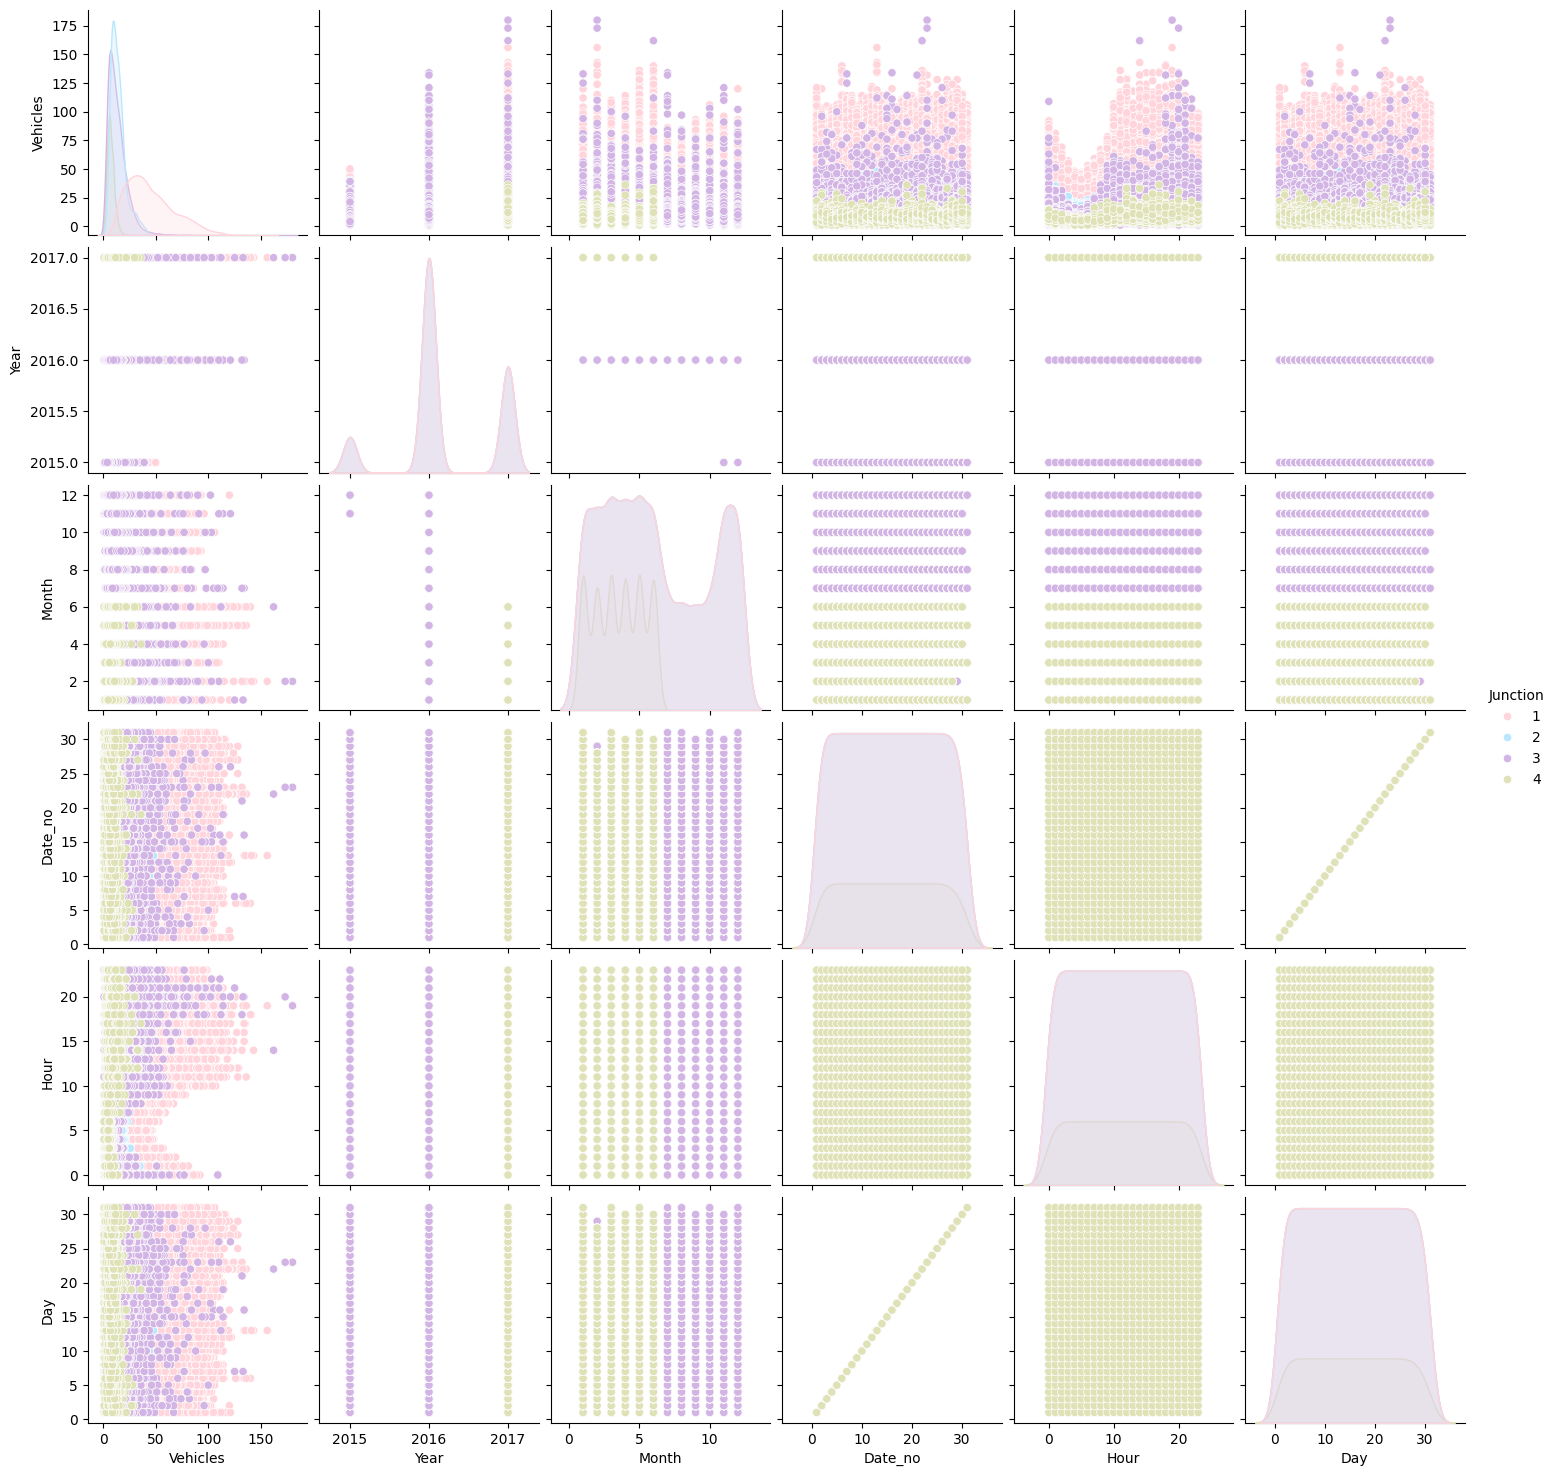

In [9]:
sns.pairplot(data=df, hue= "Junction",palette=colors)

### Data Transformation And Preprocessing

In [10]:
#Pivoting data fron junction
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

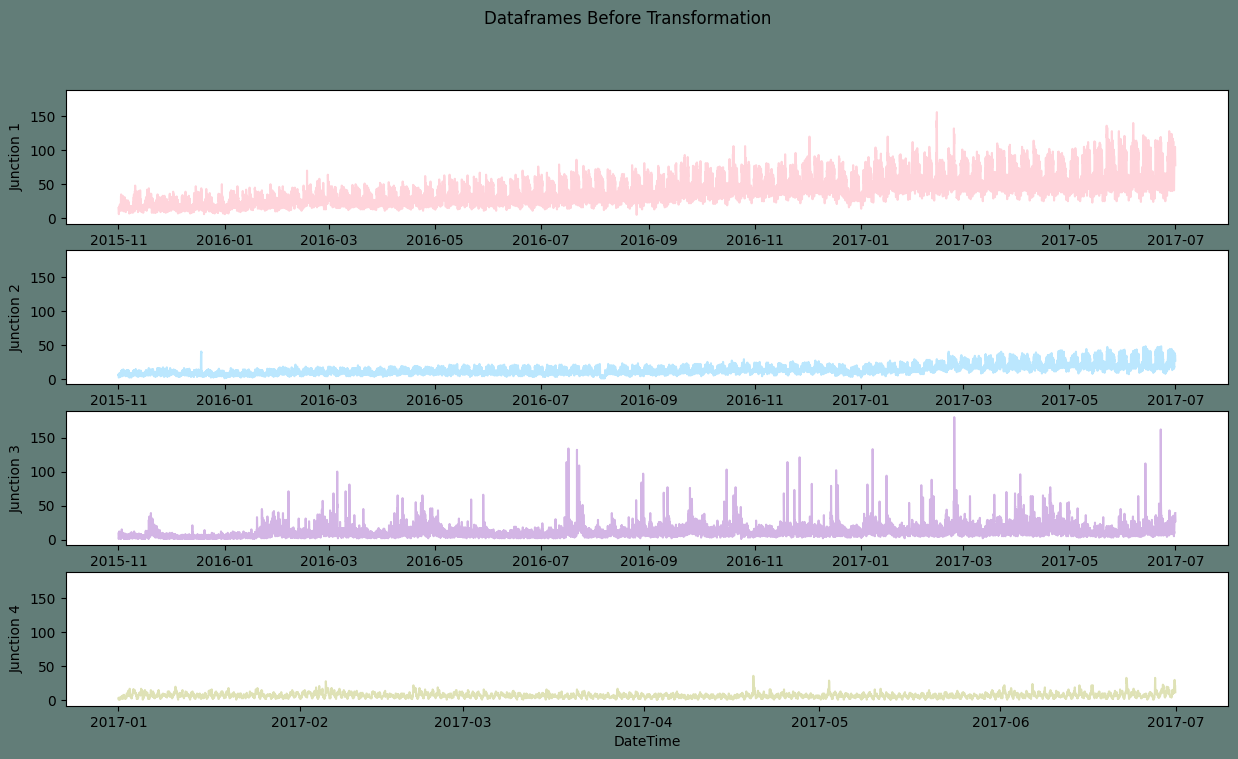

In [11]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

In [12]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [ ]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\3752011386.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\3752011386.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\3752011386.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i

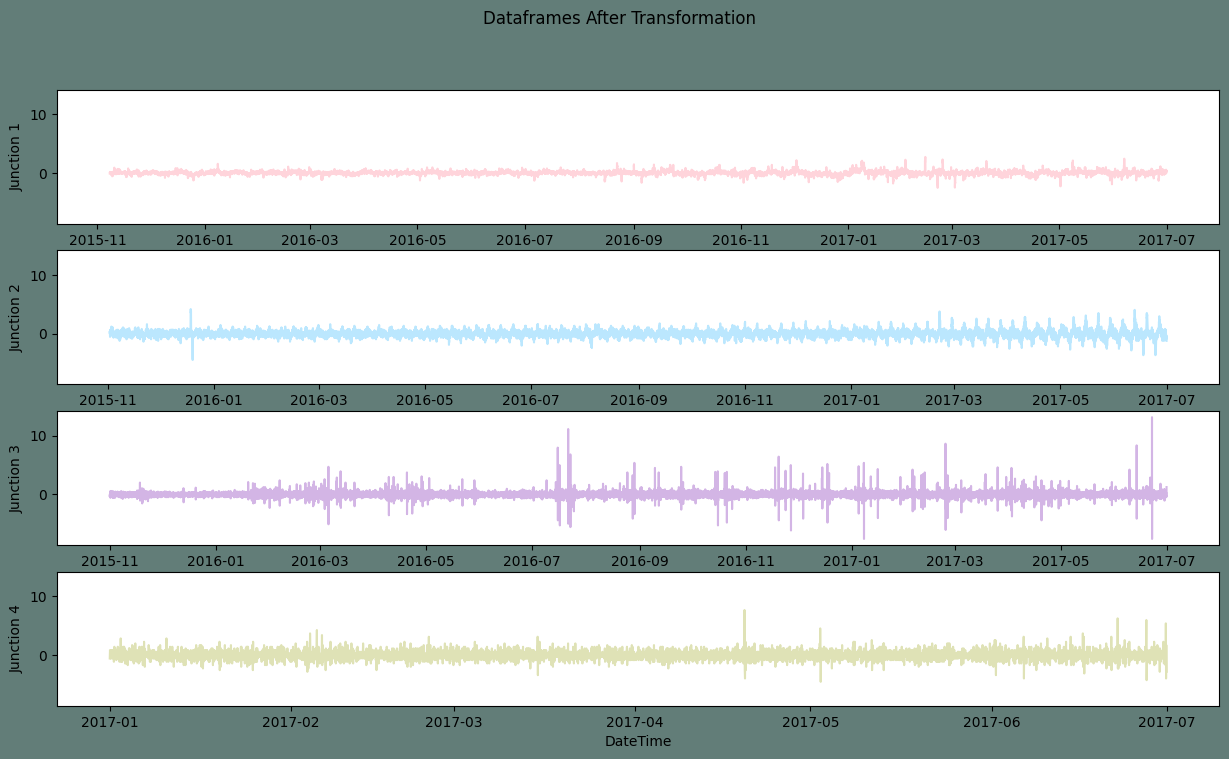

In [14]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

In [15]:
#Stationary Check for the time series Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415356
p-value: 4.798539876397955e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.795891026940073
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.0017599088326
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.979092563052184
p-value: 2.77878753259558e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [16]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

# Model Building

## ARIMA

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
plt.style.use('seaborn-v0_8-colorblind')

In [18]:
# Load the data
data = pd.read_csv('traffic.csv', parse_dates=['DateTime'])

# Filter for Junction 1
junction_1_data = data[data['Junction'] == 1].copy()

# Sort by DateTime
junction_1_data = junction_1_data.sort_values('DateTime')

# Set DateTime as index
junction_1_data.set_index('DateTime', inplace=True)

# Use float32 to reduce memory usage
junction_1_data['Vehicles'] = junction_1_data['Vehicles'].astype('float32')

# Ensure hourly frequency
junction_1_data = junction_1_data.asfreq('h')

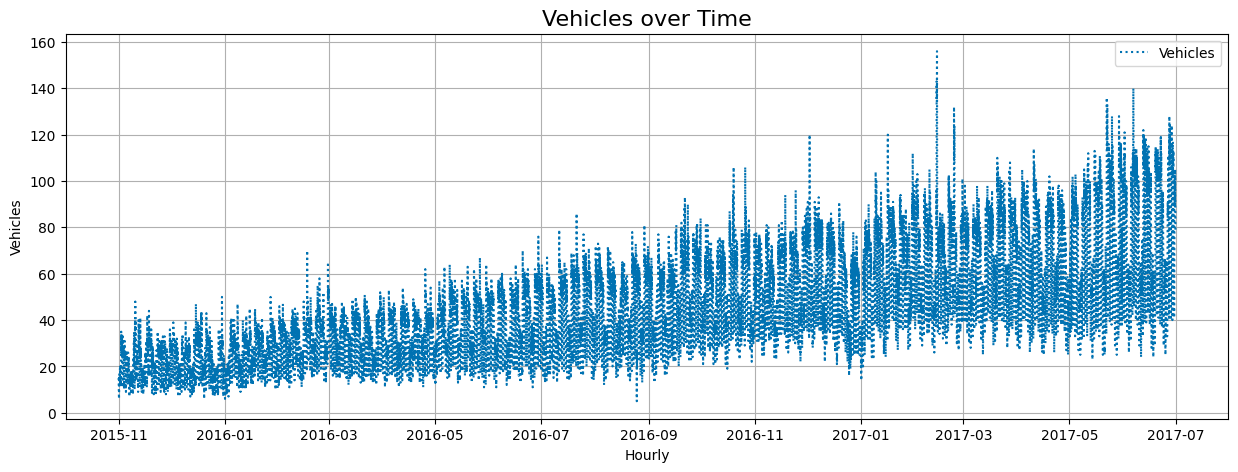

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(junction_1_data.index, junction_1_data["Vehicles"], label='Vehicles', linestyle = 'dotted')
plt.title('Vehicles over Time', fontsize=16)
plt.xlabel('Hourly')
plt.ylabel('Vehicles')
plt.legend()
plt.grid()
plt.show()

### Checking Stationary

In [20]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(junction_1_data['Vehicles'])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -7.1481
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



### Autocorrelation plot and Partial-Autocorrelation plot

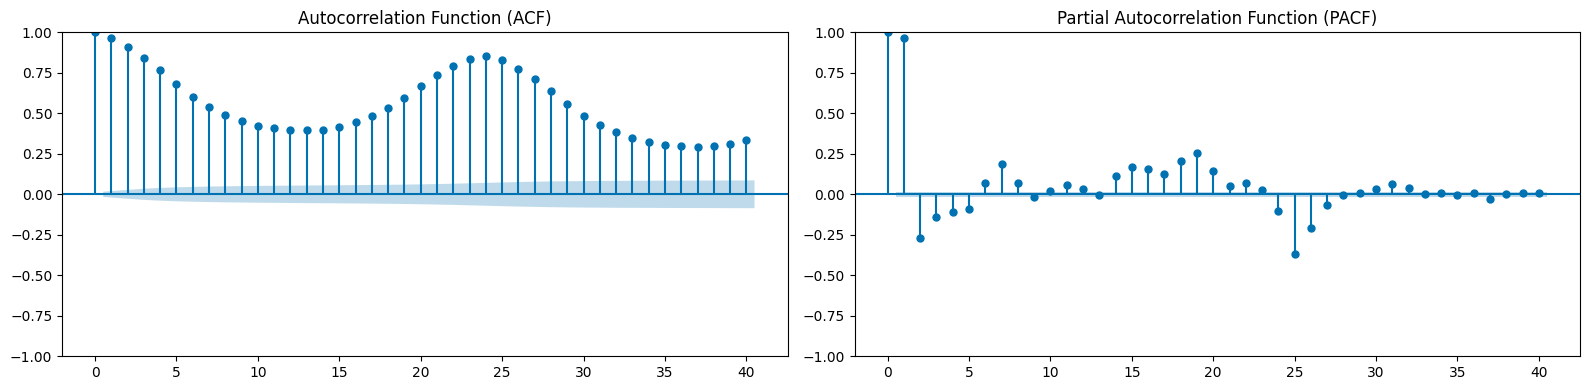

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
sm.graphics.tsa.plot_acf(junction_1_data['Vehicles'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
sm.graphics.tsa.plot_pacf(junction_1_data['Vehicles'], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### Decomposition of weekly Traffic

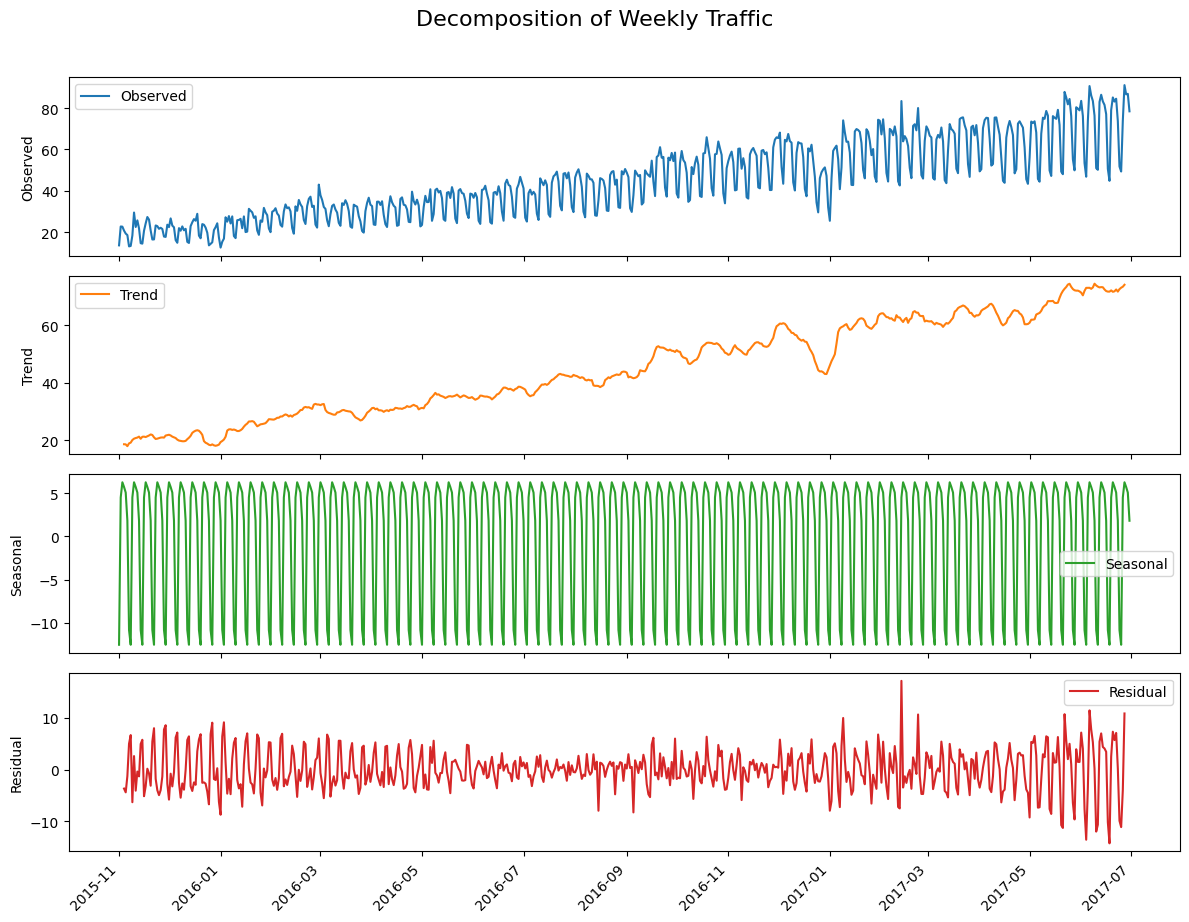

In [22]:
daily_traffic = junction_1_data['Vehicles'].resample('D').mean().copy()

# Decompose time series
decomposition = sm.tsa.seasonal_decompose(daily_traffic, model='additive', period=7)

# Create custom decomposition plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# Add main title
fig.suptitle('Decomposition of Weekly Traffic', fontsize=16, y=1.02)

# Define colors
colors = {
    'observed': '#1f77b4',
    'trend': '#ff7f0e',
    'seasonal': '#2ca02c',
    'residual': '#d62728'
}

# Plot components
ax1.plot(daily_traffic.index, decomposition.observed, label='Observed', color=colors['observed'])
ax1.set_ylabel('Observed')
ax1.legend()

ax2.plot(daily_traffic.index, decomposition.trend, label='Trend', color=colors['trend'])
ax2.set_ylabel('Trend')
ax2.legend()

ax3.plot(daily_traffic.index, decomposition.seasonal, label='Seasonal', color=colors['seasonal'])
ax3.set_ylabel('Seasonal')
ax3.legend()

ax4.plot(daily_traffic.index, decomposition.resid, label='Residual', color=colors['residual'])
ax4.set_ylabel('Residual')
ax4.legend()

# Format x-axis
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate tick labels
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

### Split into train and test

In [23]:
train_data = junction_1_data['2015-11-01':'2017-02-28']['Vehicles']
test_data = junction_1_data['2017-03-01':'2017-06-30']['Vehicles']

### Grid search for best parameters

In [24]:
p = q = range(0, 2)  # Non-seasonal AR and MA
P = Q = range(0, 2)  # Seasonal AR and MA
d = 0  # No differencing (stationary data)
D = 0  # No seasonal differencing (stationary data)
s = 24  # Daily seasonality

parameters = list(itertools.product(p, q, P, Q))
best_aic = float("inf")
best_params = None
best_model = None

for param in parameters:
    try:
        model = SARIMAX(
            train_data,
            order=(param[0], d, param[1]),
            seasonal_order=(param[2], D, param[3], s)
        )
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
            best_model = results
        print(f"Order={param[0], d, param[1]}, Seasonal={param[2], D, param[3], s}, AIC={results.aic}")
    except:
        continue

print(f"\nBest Parameters: order={(best_params[0], d, best_params[1])}, seasonal_order={(best_params[2], D, best_params[3], s)}")
print(f"Best AIC: {best_aic}")

Order=(0, 0, 0), Seasonal=(0, 0, 0, 24), AIC=121348.31650912951
Order=(0, 0, 0), Seasonal=(0, 0, 1, 24), AIC=108689.17790810147
Order=(0, 0, 0), Seasonal=(1, 0, 0, 24), AIC=89205.343078983
Order=(0, 0, 0), Seasonal=(1, 0, 1, 24), AIC=86506.02419958072


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order=(0, 0, 1), Seasonal=(0, 0, 0, 24), AIC=107118.95489792924


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order=(0, 0, 1), Seasonal=(0, 0, 1, 24), AIC=97351.02707234374


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order=(0, 0, 1), Seasonal=(1, 0, 0, 24), AIC=81138.2175404168


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order=(0, 0, 1), Seasonal=(1, 0, 1, 24), AIC=77282.37180844528
Order=(1, 0, 0), Seasonal=(0, 0, 0, 24), AIC=73689.5416319629
Order=(1, 0, 0), Seasonal=(0, 0, 1, 24), AIC=71494.1830105457
Order=(1, 0, 0), Seasonal=(1, 0, 0, 24), AIC=70005.42947754143
Order=(1, 0, 0), Seasonal=(1, 0, 1, 24), AIC=65532.60455713473
Order=(1, 0, 1), Seasonal=(0, 0, 0, 24), AIC=73351.56090966964
Order=(1, 0, 1), Seasonal=(0, 0, 1, 24), AIC=71485.0690492226
Order=(1, 0, 1), Seasonal=(1, 0, 0, 24), AIC=69787.06936847651
Order=(1, 0, 1), Seasonal=(1, 0, 1, 24), AIC=64921.63580183587

Best Parameters: order=(1, 0, 1), seasonal_order=(1, 0, 1, 24)
Best AIC: 64921.63580183587


### Fit the best model

In [25]:
final_model = SARIMAX(
    train_data,
    order=(best_params[0], d, best_params[1]),
    seasonal_order=(best_params[2], D, best_params[3], s),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = final_model.fit()

### Plot train, test, and forecast on one graph

C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\3348190465.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


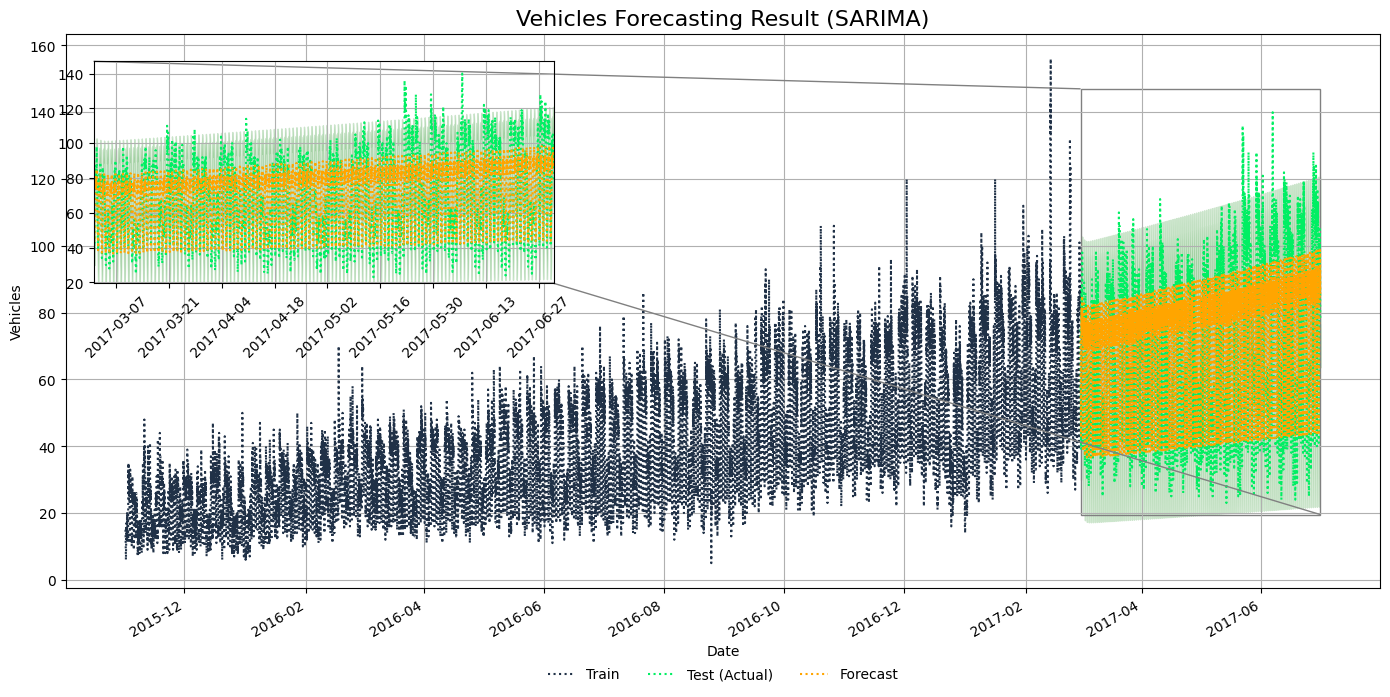

In [26]:
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Get forecast aligned with test set period
forecast = results.get_prediction(start=test_data.index[0], end=test_data.index[-1])
forecast_hourly_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
lower_ci_vals = conf_int.iloc[:, 0]
upper_ci_vals = conf_int.iloc[:, 1]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# Full plot: train, test, forecast
ax.plot(train_data.index, train_data, label='Train', color='#203147', linestyle='dotted')
ax.plot(test_data.index, test_data, label='Test (Actual)', color='#01ef63', linestyle='dotted')
ax.plot(forecast_hourly_mean.index, forecast_hourly_mean, label='Forecast', color='orange', linestyle='dotted')
ax.fill_between(forecast_hourly_mean.index, lower_ci_vals, upper_ci_vals, color='green', alpha=0.2)
ax.grid(True) 

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()

# Legend inside the plot
fig.subplots_adjust(bottom=0.18)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=3,
    frameon=False
)

ax.set_title('Vehicles Forecasting Result (SARIMA)', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Vehicles')

# Inset zoom — top-left
axins = inset_axes(ax, width="35%", height="40%", loc='upper left', borderpad=2)

axins.plot(train_data.index, train_data, color='#203147', linestyle='dotted')
axins.plot(test_data.index, test_data, color='#01ef63', linestyle='dotted')
axins.plot(forecast_hourly_mean.index, forecast_hourly_mean, color='orange', linestyle='dotted')
axins.fill_between(forecast_hourly_mean.index, lower_ci_vals, upper_ci_vals, color='green', alpha=0.2)
axins.grid(True)

# Zoom in on test + forecast period
zoom_start = test_data.index.min()
zoom_end = test_data.index.max()
axins.set_xlim(zoom_start, zoom_end)
axins.set_ylim(
    min(test_data.min().min(), forecast_hourly_mean.min()) * 0.85,
    max(test_data.max().max(), forecast_hourly_mean.max()) * 1.05
)

# Format inset x-axis
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axins.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axins.tick_params(axis='x', rotation=45)

# Connect inset and main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.show()

### Model Evaluation

In [27]:
forecast = forecast_hourly_mean[:len(test_data)]
test = test_data[:len(forecast)]

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 11.8184
MSE: 238.7529
RMSE: 15.4516
R² Score: 0.5715


### Forecast on the future

C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\1391144123.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_hourly_dates = pd.date_range(start=junction_1_data['Vehicles'].index[-1] + pd.Timedelta(hours=1), periods=forecast_hours, freq='H')


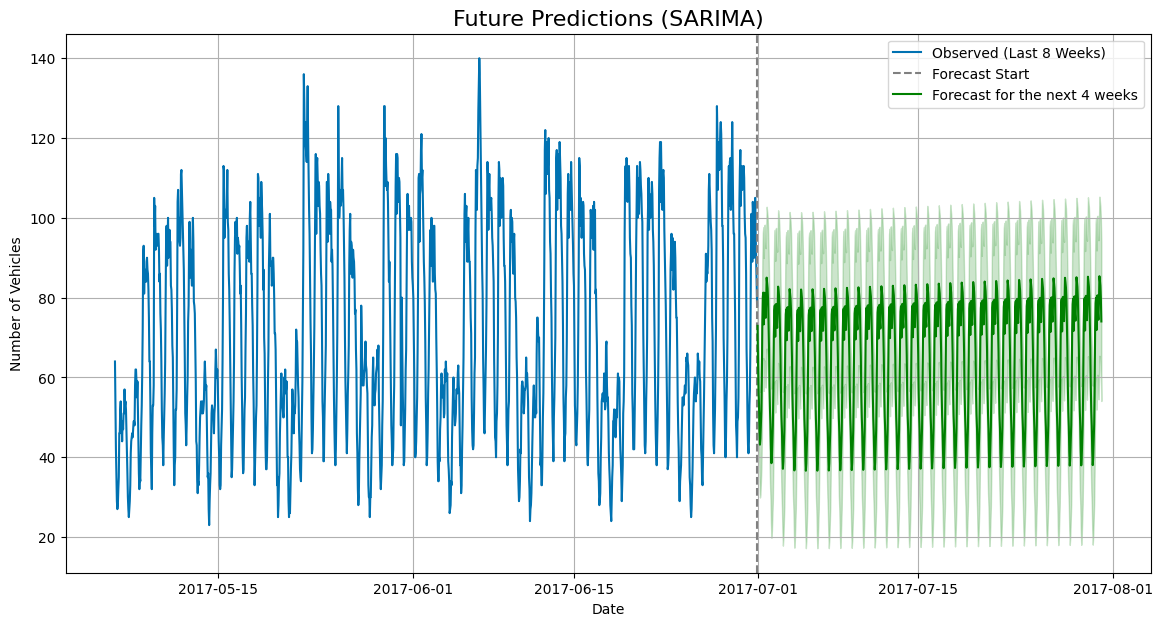

In [28]:
# Forecast next 7 days (7*24 = 168 hours)
forecast_hours = 30 * 24
sarima_hourly_forecast = results.get_forecast(steps=forecast_hours)
forecast_hourly_mean = sarima_hourly_forecast.predicted_mean
forecast_hourly_ci = sarima_hourly_forecast.conf_int()

# Prepare plotting
forecast_hourly_dates = pd.date_range(start=junction_1_data['Vehicles'].index[-1] + pd.Timedelta(hours=1), periods=forecast_hours, freq='H')
forecast_hourly_mean.index = forecast_hourly_dates
forecast_hourly_ci.index = forecast_hourly_dates

# Extract numpy values for plotting
lower_ci_vals = forecast_hourly_ci.iloc[:, 0].values
upper_ci_vals = forecast_hourly_ci.iloc[:, 1].values

# Plot
plt.figure(figsize=(14, 7))
plt.plot(junction_1_data['Vehicles'][-7*24*8:], label='Observed (Last 8 Weeks)')  # last 4 weeks for context
plt.axvline(x=junction_1_data.index.max(), color='gray', linestyle='--', label='Forecast Start')
plt.plot(forecast_hourly_mean, label='Forecast for the next 4 weeks', color='green')
plt.fill_between(forecast_hourly_mean.index, lower_ci_vals, upper_ci_vals, color='green', alpha=0.2)
plt.title('Future Predictions (SARIMA)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.grid()
plt.legend()
plt.show()


### Residue Plot

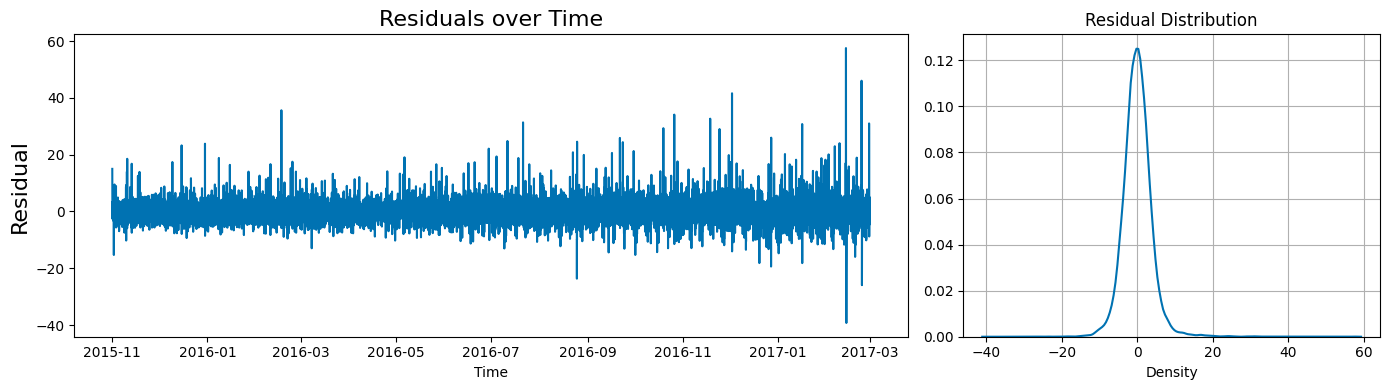

In [29]:
# Extract residuals
residuals = pd.DataFrame(results.resid)
residuals.columns = ['residual']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2, 1]})

# Plot 1: Residuals over time
axes[0].plot(residuals['residual'])
axes[0].set_title('Residuals over Time', fontsize=16)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Residual', fontsize=16)

# Plot 2: KDE distribution
sns.kdeplot(residuals['residual'], ax=axes[1])
axes[1].set_title('Residual Distribution')
axes[1].set_xlabel('Density')
axes[1].set_ylabel('')

plt.tight_layout()
plt.grid()
plt.show()

## Random Forest Regressor

### Loading Data

In [30]:
df = pd.read_csv('traffic.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)
df.head()

Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041

### Vehicles over times plot

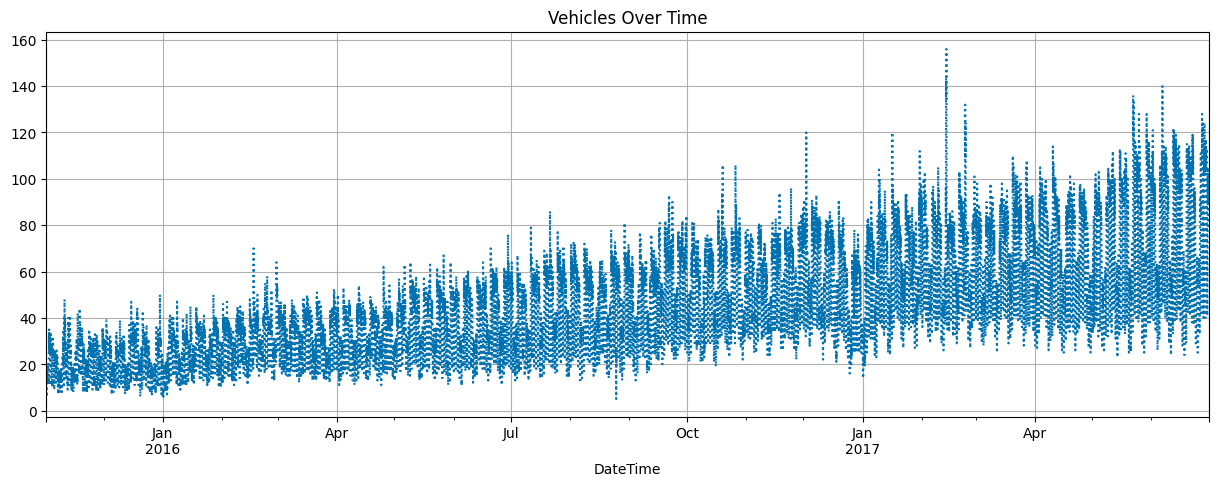

In [31]:
junction_1_data = df[df['Junction']==1] # Vehicles volume in Junction 1
junction_1_data['Vehicles'].plot(linestyle='dotted',
        figsize=(15, 5),
        title='Vehicles Over Time')
plt.grid()
plt.show()

### Vehicles Frequency plot

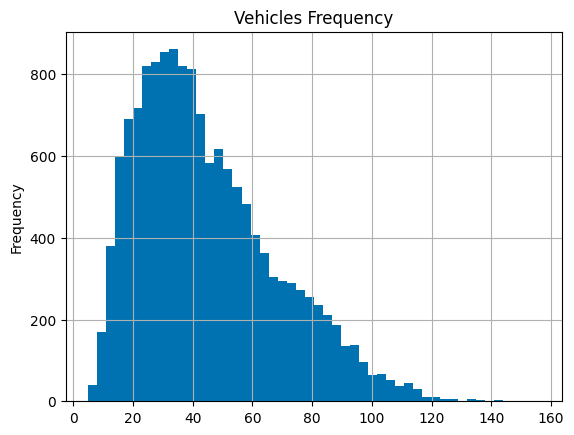

In [32]:
junction_1_data['Vehicles'].plot(kind='hist', bins=50, title='Vehicles Frequency')
plt.grid()
plt.show()

### Time Series Cross Validation

In [33]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)
junction_1_data = junction_1_data.sort_index()

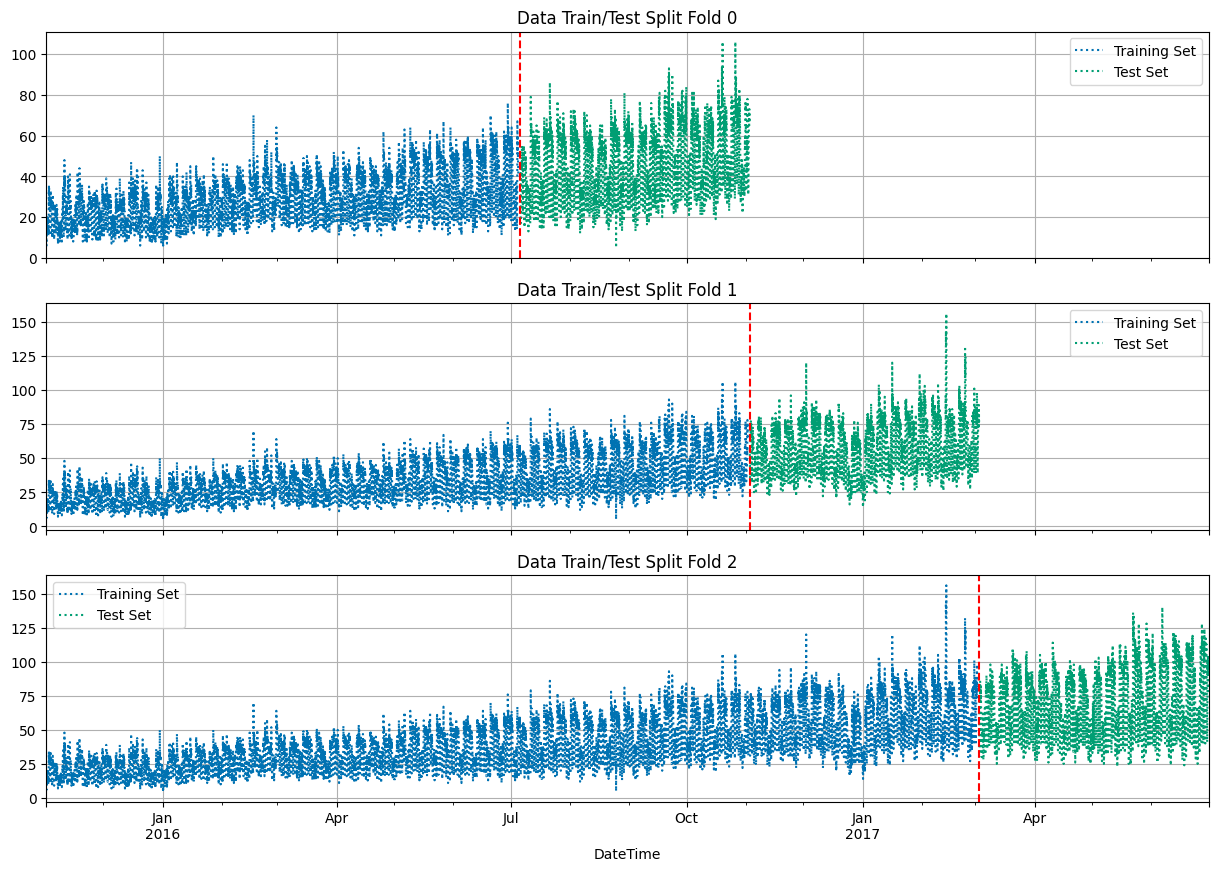

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(junction_1_data):
    train = junction_1_data.iloc[train_idx]
    test = junction_1_data.iloc[val_idx]
    train['Vehicles'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}', linestyle='dotted')
    test['Vehicles'].plot(ax=axs[fold],
                         label='Test Set', linestyle='dotted')
    axs[fold].axvline(test.index.min(), color='red', ls='--')
    axs[fold].grid(True) 
    axs[fold].legend()    
    fold += 1
plt.show()

### Week of data plot

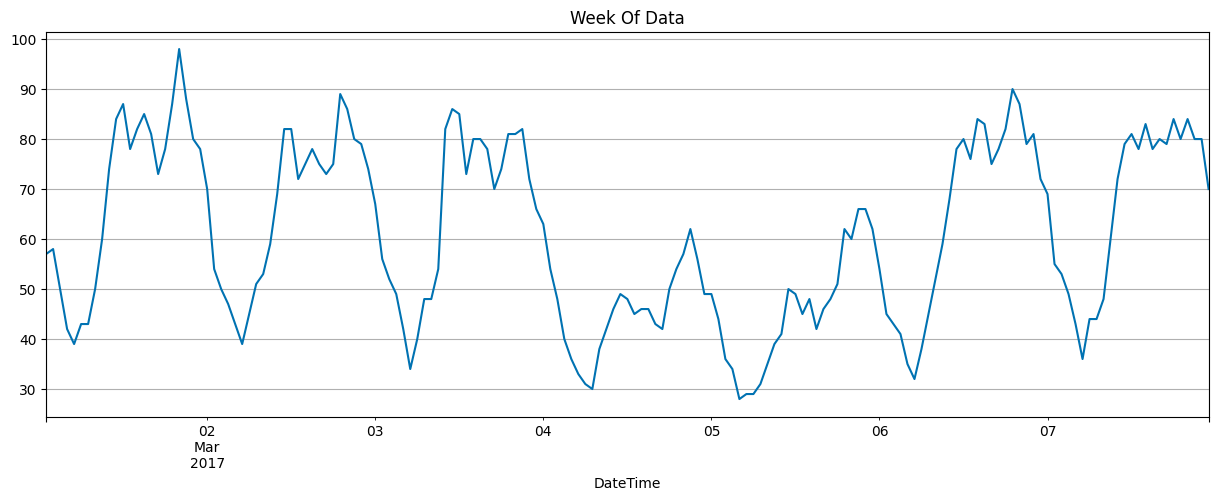

In [35]:
junction_1_data['Vehicles'].loc[(junction_1_data.index > '03-01-2017') & (junction_1_data.index < '03-08-2017')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.grid()
plt.show()

### Feature Creation

In [36]:
def create_features(junction_1_data):
    """
    Create time series features based on time series index.
    """
    junction_1_data = junction_1_data.copy()
    junction_1_data['hour'] = junction_1_data.index.hour
    junction_1_data['dayofweek'] = junction_1_data.index.dayofweek
    junction_1_data['quarter'] = junction_1_data.index.quarter
    junction_1_data['month'] = junction_1_data.index.month
    junction_1_data['year'] = junction_1_data.index.year
    junction_1_data['dayofyear'] = junction_1_data.index.dayofyear
    junction_1_data['dayofmonth'] = junction_1_data.index.day
    junction_1_data['weekofyear'] = junction_1_data.index.isocalendar().week
    return junction_1_data

junction_1_data = create_features(junction_1_data)

### Model Training

In [37]:
from sklearn.ensemble import RandomForestRegressor

tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)
junction_1_data = junction_1_data.sort_index()

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(junction_1_data):
    train = junction_1_data.iloc[train_idx]
    test = junction_1_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
    TARGET = 'Vehicles'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

In [38]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 23.1920
Fold scores:[np.float64(23.02087474744124), np.float64(35.40844193820997), np.float64(11.146753506841325)]


In [39]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Create features
junction_1_data = create_features(junction_1_data)

# Define features and target
FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'Vehicles'

# Prepare data
X_all = junction_1_data[FEATURES]
y_all = junction_1_data[TARGET]

# Initialize Random Forest model
reg = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15]
}

# Set up TimeSeriesSplit for cross-validation
tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=tss,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_all, y_all)

# Print best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best RMSE score: {-grid_search.best_score_:.4f}')

# Get the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE score: 23.1920


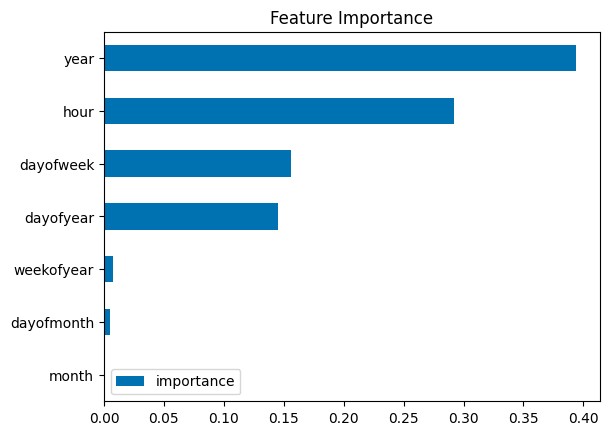

In [40]:
fi = pd.DataFrame(data=best_model.feature_importances_,
             index=best_model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecast on Test

C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\764815080.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


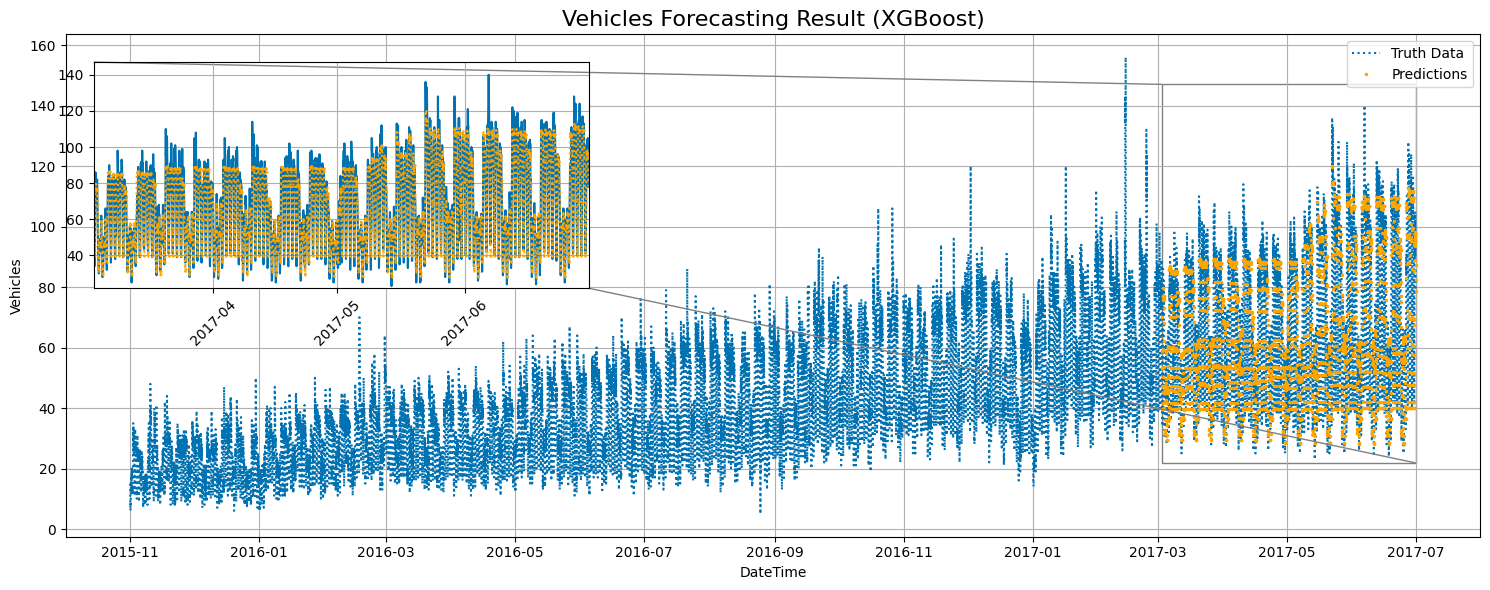

In [41]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Forecast on Test
test['prediction'] = best_model.predict(X_test)

# Reset index of both dataframes before merging to avoid index mismatch
junction_1_data = junction_1_data.reset_index()
test = test.reset_index()

# Merge based on shared columns, if any, or on the 'DateTime' column if it exists in both
# Assuming 'DateTime' exists in both:
junction_1_data = pd.merge(junction_1_data, test[['DateTime', 'prediction']], on='DateTime', how='left')

# Set 'DateTime' back as index if needed
junction_1_data = junction_1_data.set_index('DateTime')

# Main plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(junction_1_data.index, junction_1_data['Vehicles'], label='Truth Data', linestyle='dotted')
ax.plot(junction_1_data.index, junction_1_data['prediction'], label='Predictions', linestyle='None', marker='.', color='orange', markersize=3)

# Titles and legend
ax.set_title('Vehicles Forecasting Result (XGBoost)', fontsize=16)
ax.set_xlabel('DateTime')
ax.set_ylabel('Vehicles')
ax.grid(True)
ax.legend(loc='upper right')

# Inset
axins = inset_axes(ax, width="35%", height="45%", loc='upper left', borderpad=2)
axins.plot(junction_1_data.index, junction_1_data['Vehicles'])
axins.plot(junction_1_data.index, junction_1_data['prediction'], linestyle='dotted', marker='.', color='orange', markersize=1)

# Zoom range
zoom_start = test['DateTime'].min()
zoom_end = test['DateTime'].max()
axins.set_xlim(zoom_start, zoom_end)
axins.set_ylim(
    min(junction_1_data.loc[zoom_start:zoom_end]['Vehicles'].min(), junction_1_data.loc[zoom_start:zoom_end]['prediction'].min()) * 0.95,
    max(junction_1_data.loc[zoom_start:zoom_end]['Vehicles'].max(), junction_1_data.loc[zoom_start:zoom_end]['prediction'].max()) * 1.05
)

# Clean date format inside zoom
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axins.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axins.tick_params(axis='x', rotation=45)

# Connect box
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.grid()
plt.show()

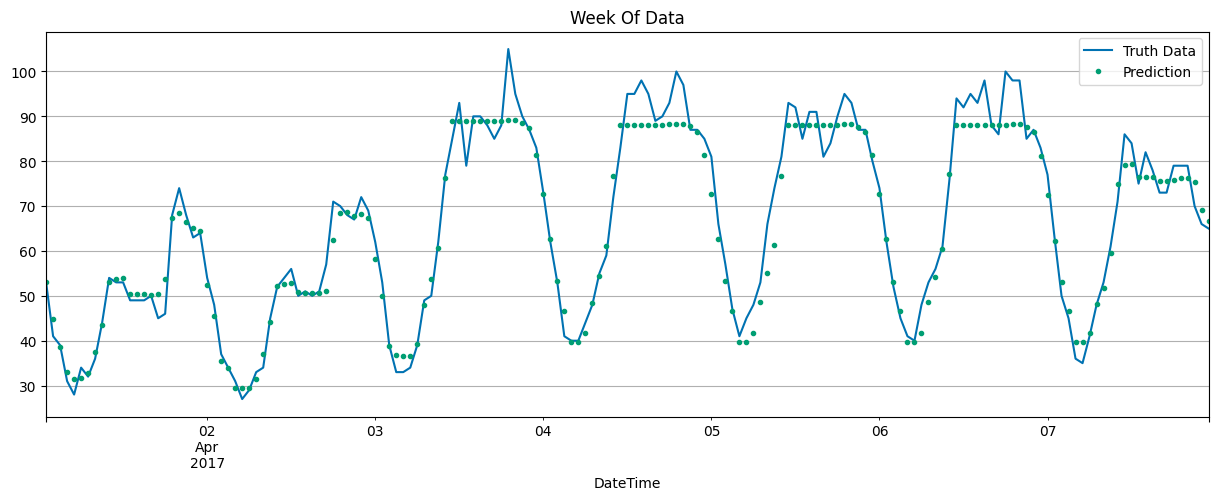

In [42]:
ax = junction_1_data.loc[(junction_1_data.index > '04-01-2017') & (junction_1_data.index < '04-08-2017')]['Vehicles'] \
    .plot(figsize=(15, 5), title='Week Of Data')
junction_1_data.loc[(junction_1_data.index > '04-01-2017') & (junction_1_data.index < '04-08-2017')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test['Vehicles'], test['prediction'])
mse = mean_squared_error(test['Vehicles'], test['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Vehicles'], test['prediction'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 3.3824
MSE: 22.9632
RMSE: 4.7920
R² Score: 0.9591


### Calculate Error

In [44]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test['DateTime']
result = test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

result_df = pd.DataFrame(result).reset_index()
result_df.columns = ['Date', 'Mean Error']
result_df

Date  Mean Error
0 2017-06-06 18:00:00   31.410656
1 2017-05-01 16:00:00   27.844340
2 2017-06-06 19:00:00   27.410656
3 2017-06-26 11:00:00   26.885694
4 2017-06-06 17:00:00   25.688491
5 2017-04-10 11:00:00   25.108389
6 2017-05-01 13:00:00   24.494607
7 2017-03-13 11:00:00   23.552730
8 2017-03-13 12:00:00   22.680672
9 2017-06-26 13:00:00   21.377159

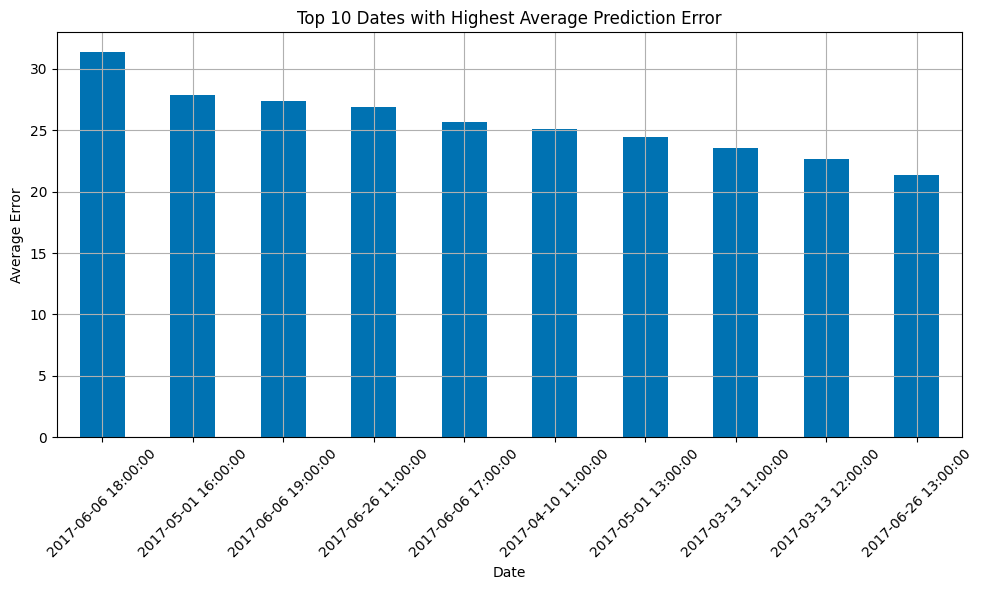

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
result.plot(kind='bar')
plt.title('Top 10 Dates with Highest Average Prediction Error')
plt.xlabel('Date')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [46]:
junction_1_data.index.max()

Timestamp('2017-06-30 23:00:00')

In [47]:
# Create future dataframe
future = pd.date_range(junction_1_data.index.max(),'2017-8-01', freq='1h')
future_junction_1_data = pd.DataFrame(index=future)
future_junction_1_data['isFuture'] = True
junction_1_data['isFuture'] = False
df_and_future_1 = pd.concat([junction_1_data, future_junction_1_data])
df_and_future_1 = create_features(df_and_future_1)
# df_and_future_1 = add_lags(df_and_future_1)

### Predict the future

In [48]:
future_w_features_1 = df_and_future_1.query('isFuture').copy()

In [49]:
future_w_features_1['pred'] = best_model.predict(future_w_features_1[FEATURES])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


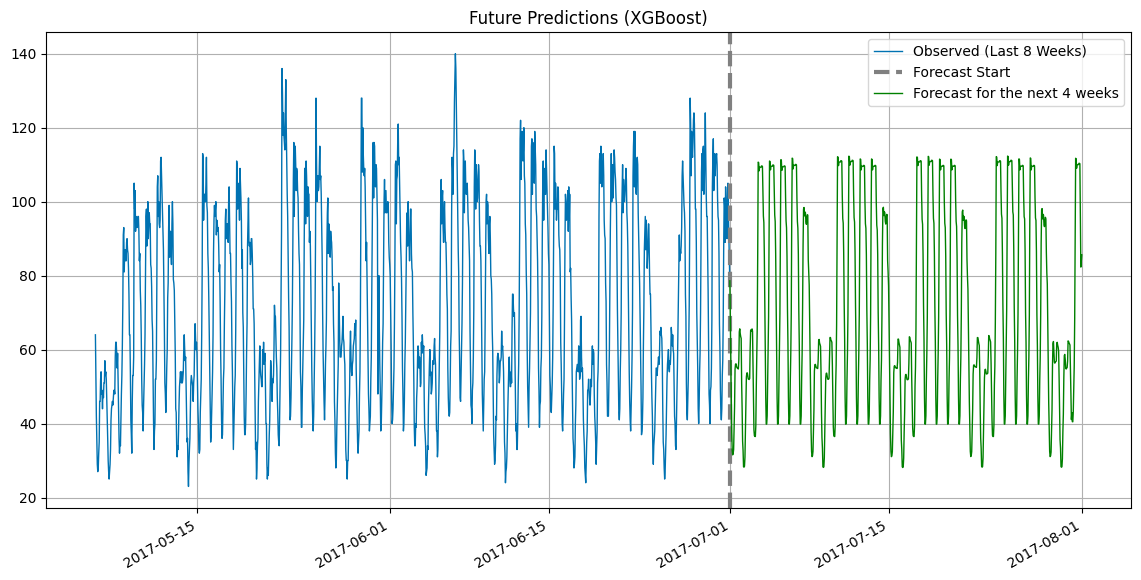

In [50]:
plt.plot(junction_1_data['Vehicles'][-24*7*8:], label='Observed (Last 8 Weeks)', ms=1, lw=1)
plt.axvline(x=junction_1_data.index.max(), color='gray', linestyle='--', label='Forecast Start', ms=1, lw=3)
future_w_features_1['pred'].plot(figsize=(14, 7),
                               color='green',
                               ms=1,
                               lw=1,
                               title='Future Predictions (XGBoost)', label='Forecast for the next 4 weeks')
plt.legend()
plt.grid()
plt.show()

## XGBoost

### Model Training

In [51]:
import xgboost as xgb

tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)
j_junction_1_data1 = junction_1_data.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(junction_1_data):
    train = junction_1_data.iloc[train_idx]
    test = junction_1_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth','weekofyear']
    TARGET = 'Vehicles'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:30.05273	validation_1-rmse:47.47047


[100]	validation_0-rmse:12.36001	validation_1-rmse:29.08899
[200]	validation_0-rmse:6.56759	validation_1-rmse:21.12116


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [02:54:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[300]	validation_0-rmse:4.81859	validation_1-rmse:17.65425
[400]	validation_0-rmse:4.26225	validation_1-rmse:15.89192
[500]	validation_0-rmse:4.00819	validation_1-rmse:15.27398
[600]	validation_0-rmse:3.86439	validation_1-rmse:15.15472
[700]	validation_0-rmse:3.75674	validation_1-rmse:15.06692
[800]	validation_0-rmse:3.66831	validation_1-rmse:15.00489
[900]	validation_0-rmse:3.59844	validation_1-rmse:14.96338
[999]	validation_0-rmse:3.54479	validation_1-rmse:14.91308
[0]	validation_0-rmse:36.55584	validation_1-rmse:59.27228
[100]	validation_0-rmse:15.53221	validation_1-rmse:40.06634
[200]	validation_0-rmse:8.31608	validation_1-rmse:32.59818
[300]	validation_0-rmse:5.99611	validation_1-rmse:29.73700


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [02:54:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[400]	validation_0-rmse:5.13274	validation_1-rmse:28.87149
[500]	validation_0-rmse:4.77314	validation_1-rmse:28.61110
[600]	validation_0-rmse:4.58349	validation_1-rmse:28.42593
[700]	validation_0-rmse:4.44084	validation_1-rmse:28.36473
[792]	validation_0-rmse:4.33751	validation_1-rmse:28.35940
[0]	validation_0-rmse:43.16783	validation_1-rmse:70.08517
[100]	validation_0-rmse:18.87553	validation_1-rmse:35.02918
[200]	validation_0-rmse:10.56172	validation_1-rmse:21.73788
[300]	validation_0-rmse:7.60398	validation_1-rmse:16.36077


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [02:54:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[400]	validation_0-rmse:6.49095	validation_1-rmse:13.90139
[500]	validation_0-rmse:5.97591	validation_1-rmse:12.82031
[600]	validation_0-rmse:5.68906	validation_1-rmse:12.25675
[700]	validation_0-rmse:5.49346	validation_1-rmse:11.96461
[800]	validation_0-rmse:5.34875	validation_1-rmse:11.65368
[900]	validation_0-rmse:5.22757	validation_1-rmse:11.42041
[999]	validation_0-rmse:5.13106	validation_1-rmse:11.24420


In [52]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 18.1694
Fold scores:[np.float64(14.912952891377001), np.float64(28.350901583644017), np.float64(11.244198468834627)]


In [53]:
from sklearn.model_selection import GridSearchCV

junction_1_data = create_features(junction_1_data)

# Define features and target
FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'Vehicles'

# Prepare data
X_all = junction_1_data[FEATURES]
y_all = junction_1_data[TARGET]

# Initialize XGBoost model
reg = xgb.XGBRegressor(
    booster='gbtree',
    objective='reg:squarederror',  # Updated from reg:linear
    early_stopping_rounds=50
)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Set up TimeSeriesSplit for cross-validation
tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)

# Set up GridSearchCV
grid_search_1 = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=tss,  # Use TimeSeriesSplit for CV
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search_1.fit(
    X_all, y_all,
    eval_set=[(X_all, y_all)],
    verbose=100
)

# Print best parameters and score
print(f'Best parameters: {grid_search_1.best_params_}')
print(f'Best RMSE score: {-grid_search_1.best_score_}')

# Get the best model
best_model_1 = grid_search_1.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[0]	validation_0-rmse:22.21647
[100]	validation_0-rmse:6.40340
[200]	validation_0-rmse:5.55517
[300]	validation_0-rmse:5.19082
[400]	validation_0-rmse:4.96228
[500]	validation_0-rmse:4.80511
[600]	validation_0-rmse:4.67631
[700]	validation_0-rmse:4.55275
[800]	validation_0-rmse:4.45919
[900]	validation_0-rmse:4.38763
[999]	validation_0-rmse:4.32785
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}
Best RMSE score: 17.93296718597412


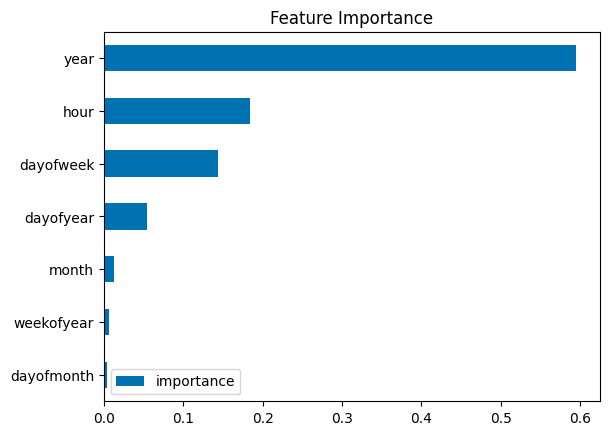

In [54]:
fi = pd.DataFrame(data=best_model_1.feature_importances_,
             index=best_model_1.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecast on Test

C:\Users\ASUS\AppData\Local\Temp\ipykernel_452\1547368942.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


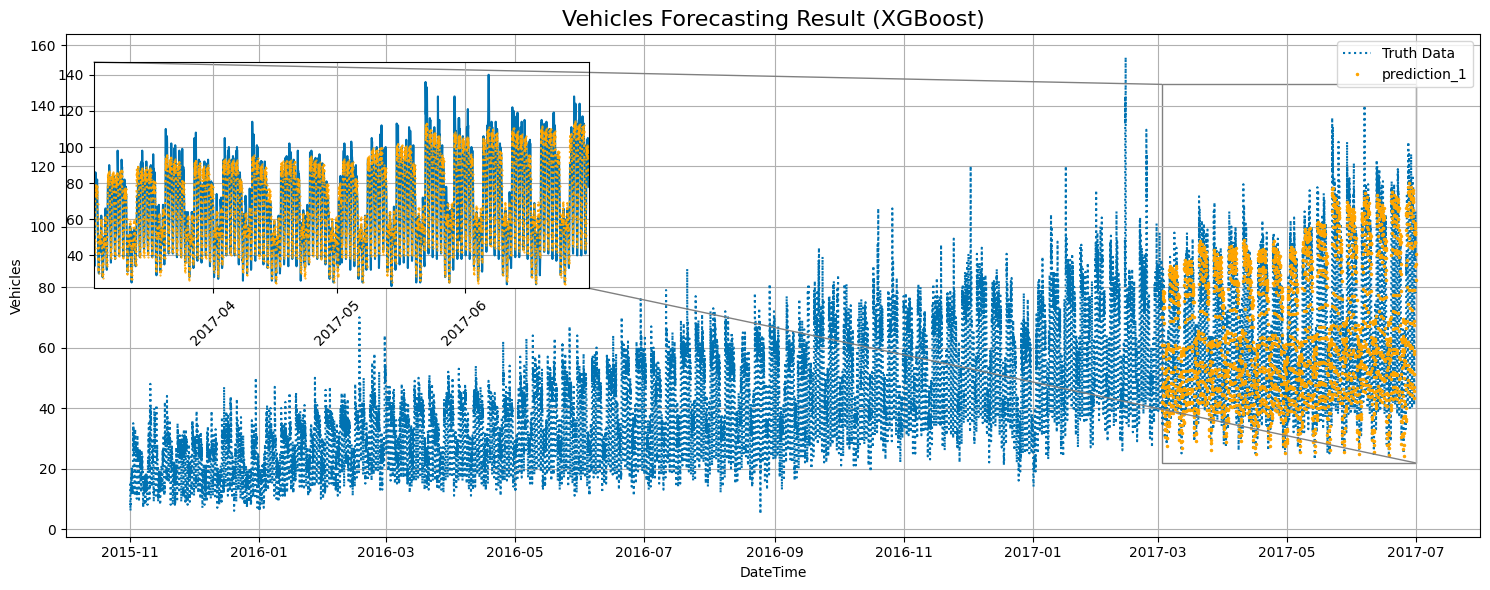

In [55]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Forecast on Test
test['prediction_1'] = best_model_1.predict(X_test)

# Reset index of both dataframes before merging to avoid index mismatch
junction_1_data = junction_1_data.reset_index()
test = test.reset_index()

# Merge based on shared columns, if any, or on the 'DateTime' column if it exists in both
# Assuming 'DateTime' exists in both:
junction_1_data = pd.merge(junction_1_data, test[['DateTime', 'prediction_1']], on='DateTime', how='left')

# Set 'DateTime' back as index if needed
junction_1_data = junction_1_data.set_index('DateTime')

# Main plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(junction_1_data.index, junction_1_data['Vehicles'], label='Truth Data', linestyle='dotted')
ax.plot(junction_1_data.index, junction_1_data['prediction_1'], label='prediction_1', linestyle='None', marker='.', color='orange', markersize=3)

# Titles and legend
ax.set_title('Vehicles Forecasting Result (XGBoost)', fontsize=16)
ax.set_xlabel('DateTime')
ax.set_ylabel('Vehicles')
ax.grid(True)
ax.legend(loc='upper right')

# Inset
axins = inset_axes(ax, width="35%", height="45%", loc='upper left', borderpad=2)
axins.plot(junction_1_data.index, junction_1_data['Vehicles'])
axins.plot(junction_1_data.index, junction_1_data['prediction_1'], linestyle='dotted', marker='.', color='orange', markersize=1)

# Zoom range
zoom_start = test['DateTime'].min()
zoom_end = test['DateTime'].max()
axins.set_xlim(zoom_start, zoom_end)
axins.set_ylim(
    min(junction_1_data.loc[zoom_start:zoom_end]['Vehicles'].min(), junction_1_data.loc[zoom_start:zoom_end]['prediction_1'].min()) * 0.95,
    max(junction_1_data.loc[zoom_start:zoom_end]['Vehicles'].max(), junction_1_data.loc[zoom_start:zoom_end]['prediction_1'].max()) * 1.05
)

# Clean date format inside zoom
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axins.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axins.tick_params(axis='x', rotation=45)

# Connect box
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.grid()
plt.show()

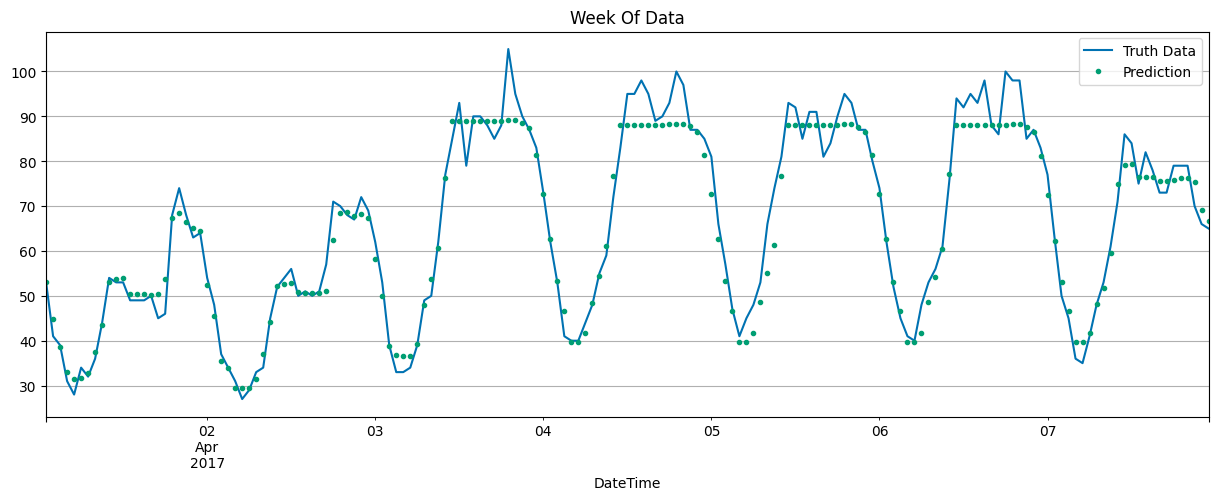

In [56]:
ax = junction_1_data.loc[(junction_1_data.index > '04-01-2017') & (junction_1_data.index < '04-08-2017')]['Vehicles'] \
    .plot(figsize=(15, 5), title='Week Of Data')
junction_1_data.loc[(junction_1_data.index > '04-01-2017') & (junction_1_data.index < '04-08-2017')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

### Model Evaluation

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test['Vehicles'], test['prediction'])
mse = mean_squared_error(test['Vehicles'], test['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Vehicles'], test['prediction'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 3.3824
MSE: 22.9632
RMSE: 4.7920
R² Score: 0.9591


### Calculate Error

In [58]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test['DateTime']
result = test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

result_df = pd.DataFrame(result).reset_index()
result_df.columns = ['Date', 'Mean Error']
result_df

Date  Mean Error
0 2017-06-06 18:00:00   31.410656
1 2017-05-01 16:00:00   27.844340
2 2017-06-06 19:00:00   27.410656
3 2017-06-26 11:00:00   26.885694
4 2017-06-06 17:00:00   25.688491
5 2017-04-10 11:00:00   25.108389
6 2017-05-01 13:00:00   24.494607
7 2017-03-13 11:00:00   23.552730
8 2017-03-13 12:00:00   22.680672
9 2017-06-26 13:00:00   21.377159

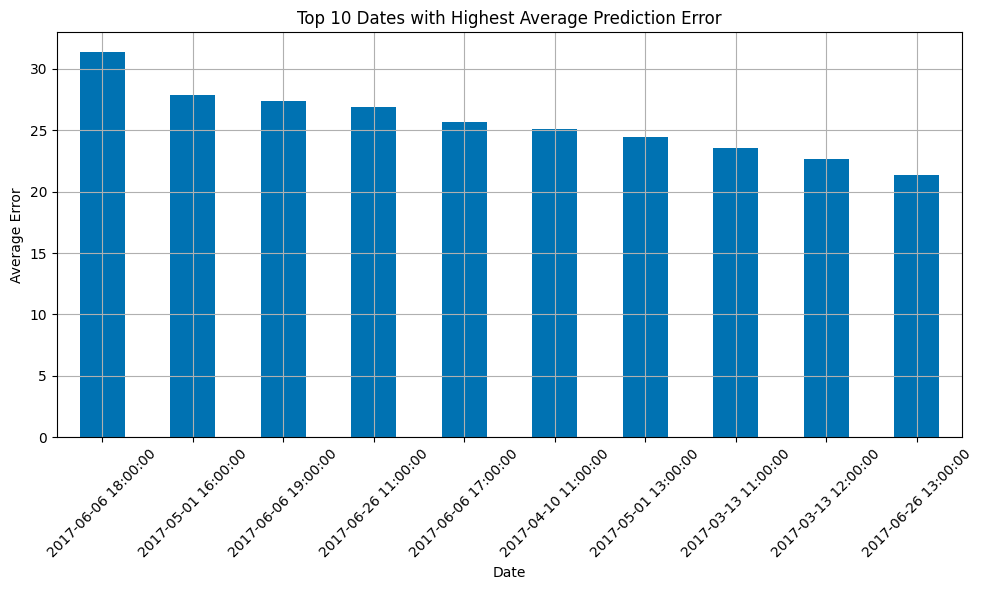

In [59]:
# Plotting
plt.figure(figsize=(10, 6))
result.plot(kind='bar')
plt.title('Top 10 Dates with Highest Average Prediction Error')
plt.xlabel('Date')
plt.ylabel('Average Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [60]:
junction_1_data.index.max()

Timestamp('2017-06-30 23:00:00')

In [61]:
# Create future dataframe
future = pd.date_range('2017-06-30','2017-8-01', freq='1h')
future_df_1 = pd.DataFrame(index=future)
future_df_1['isFuture'] = True
junction_1_data['isFuture'] = False
df_and_future_1 = pd.concat([junction_1_data, future_df_1])
df_and_future_1 = create_features(df_and_future_1)

In [62]:
future_w_features_1 = df_and_future_1.query('isFuture').copy()

### Predict the future

In [63]:
future_w_features_1['pred'] = best_model_1.predict(future_w_features_1[FEATURES])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


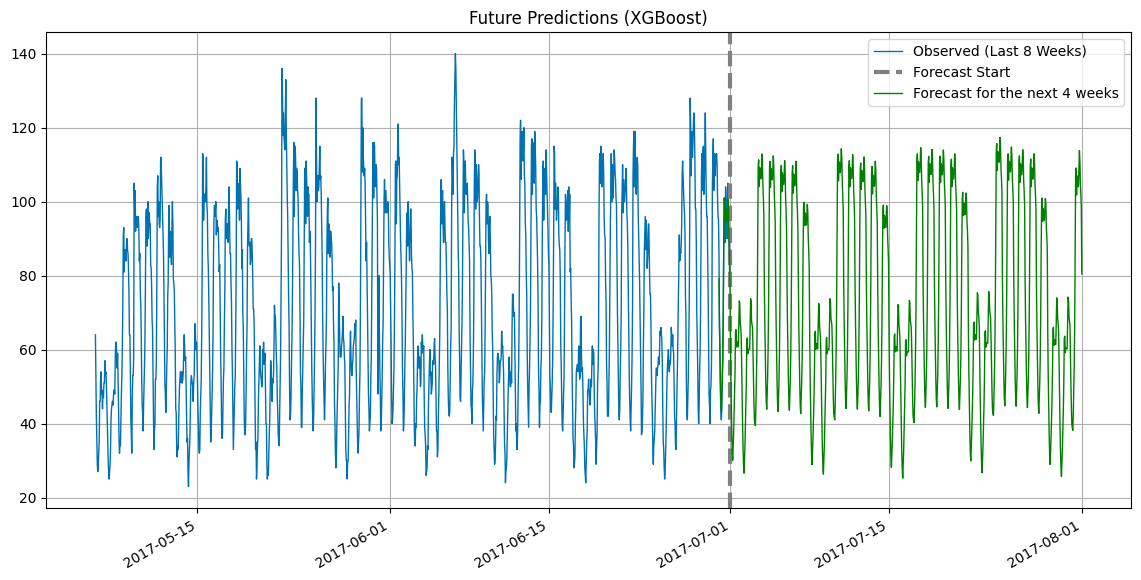

In [64]:
plt.plot(junction_1_data['Vehicles'][-24*7*8:], label='Observed (Last 8 Weeks)', ms=1, lw=1)
plt.axvline(x=junction_1_data.index.max(), color='gray', linestyle='--', label='Forecast Start', ms=1, lw=3)
future_w_features_1['pred'].plot(figsize=(14, 7),
                               color='green',
                               ms=1,
                               lw=1,
                               title='Future Predictions (XGBoost)', label='Forecast for the next 4 weeks')
plt.legend()
plt.grid()
plt.show()

## LSTM

### Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

### Load and preprocess

In [66]:
df = pd.read_csv('traffic.csv')
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df[df["Junction"] == 1].copy()
df.set_index("DateTime", inplace=True)
df.sort_index(inplace=True)
df = df[["Vehicles"]]

### Scaling

In [67]:
scaler = MinMaxScaler()
df["ScaledVehicles"] = scaler.fit_transform(df[["Vehicles"]])

### Create sequences

In [68]:
sequence_length = 24
X, y = [], []
data = df["ScaledVehicles"].values

for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X = np.array(X)
y = np.array(y)

### Train/Test split

In [69]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Build LSTM Model

In [70]:
model = Sequential([
    Input(shape=(24, 1)),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

### Train Model

In [71]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0128 - val_loss: 0.0078
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 9/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 10/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 0.0020


### Predict

In [72]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Evaluate Model

In [73]:
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 4.8514
MSE: 45.1660
RMSE: 6.7206
R² Score: 0.9191


### Plot True vs Predicted

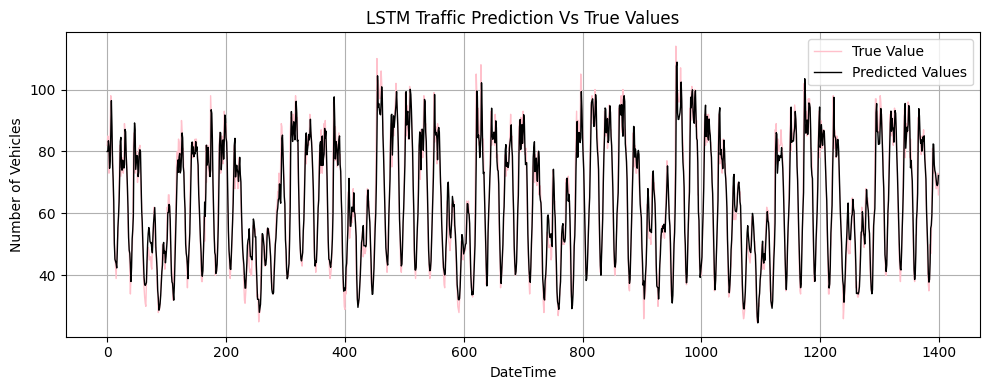

In [74]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_actual[:1400], label="True Value", color='pink', linewidth=1)
plt.plot(y_pred[:1400], label="Predicted Values", color='black', linewidth=1)
plt.title("LSTM Traffic Prediction Vs True Values")
plt.xlabel("DateTime")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.grid()
plt.show()

## GRU

###  Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Fitting the Model

In [76]:
#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets 
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target 
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

### Model for the prediction

In [77]:
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    #callback delta 0.01 may interrupt the learning, could eliminate this step, but meh!
    
    #The GRU model 
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    #model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    #Compiling the model
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, epochs=50, batch_size=150,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#627D78")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [78]:
#Predictions For First Junction
PredJ1 = GRU_model(X_trainJ1, y_trainJ1, X_testJ1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - loss: 0.0883
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0703
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0681
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0666
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0596
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0623
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0619
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0570
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0556
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0581
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0589
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0588
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0555
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0533
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0555
Epo

The root mean squared error is 0.2460034968916662.


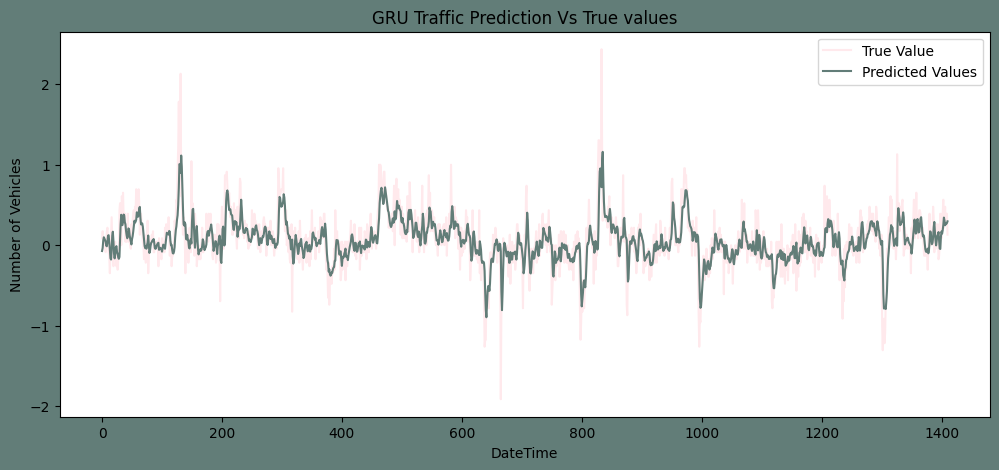

In [79]:
#Results for J1 
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
RMSE_J1=RMSE_Value(y_testJ1,PredJ1)
PredictionsPlot(y_testJ1,PredJ1,0)

### Functions to inverse transforms

In [80]:
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

### invert the differenced forecast

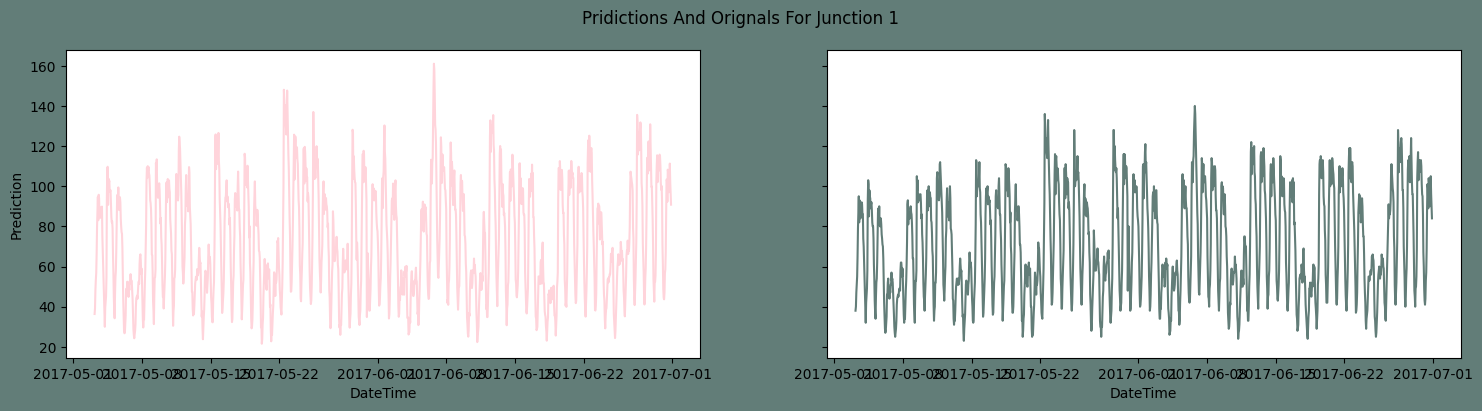

In [81]:
recover1 = df_N1.Norm[-1412:-1].to_frame()
recover1["Pred"]= PredJ1
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_J1.columns = ["Pred_Normed"]
#Invert the normalizeation J1
Final_J1_Pred = (Transform_reverssed_J1.values* std_J1) + av_J1
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred
#Plotting the Predictions with orignals 
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], df_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)